# Dataset Description:
The dataset consists of the following variables:

**Price:** Offer Price in EUROs

**Age:** Age in years

**KM:** Accumulated Kilometers on odometer

**FuelType:** Fuel Type (Petrol, Diesel, CNG)

**HP:** Horse Power

**Automatic:** Automatic ( (Yes=1, No=0)

**CC:** Cylinder Volume in cubic centimeters

**Doors:** Number of doors

**Weight:** Weight in Kilograms

**Cylinders:**

**Gears:**



In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
print("Dataset Preview:")
data.head()
data

Dataset Preview:


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


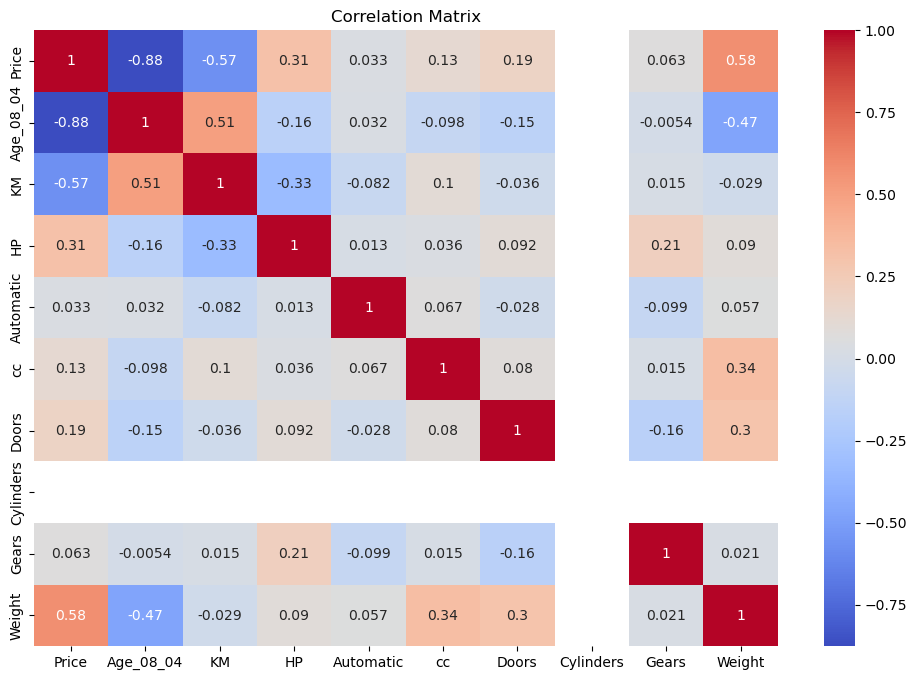

In [7]:
# Correlation matrix to check multicollinearity
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns="Fuel_Type").corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

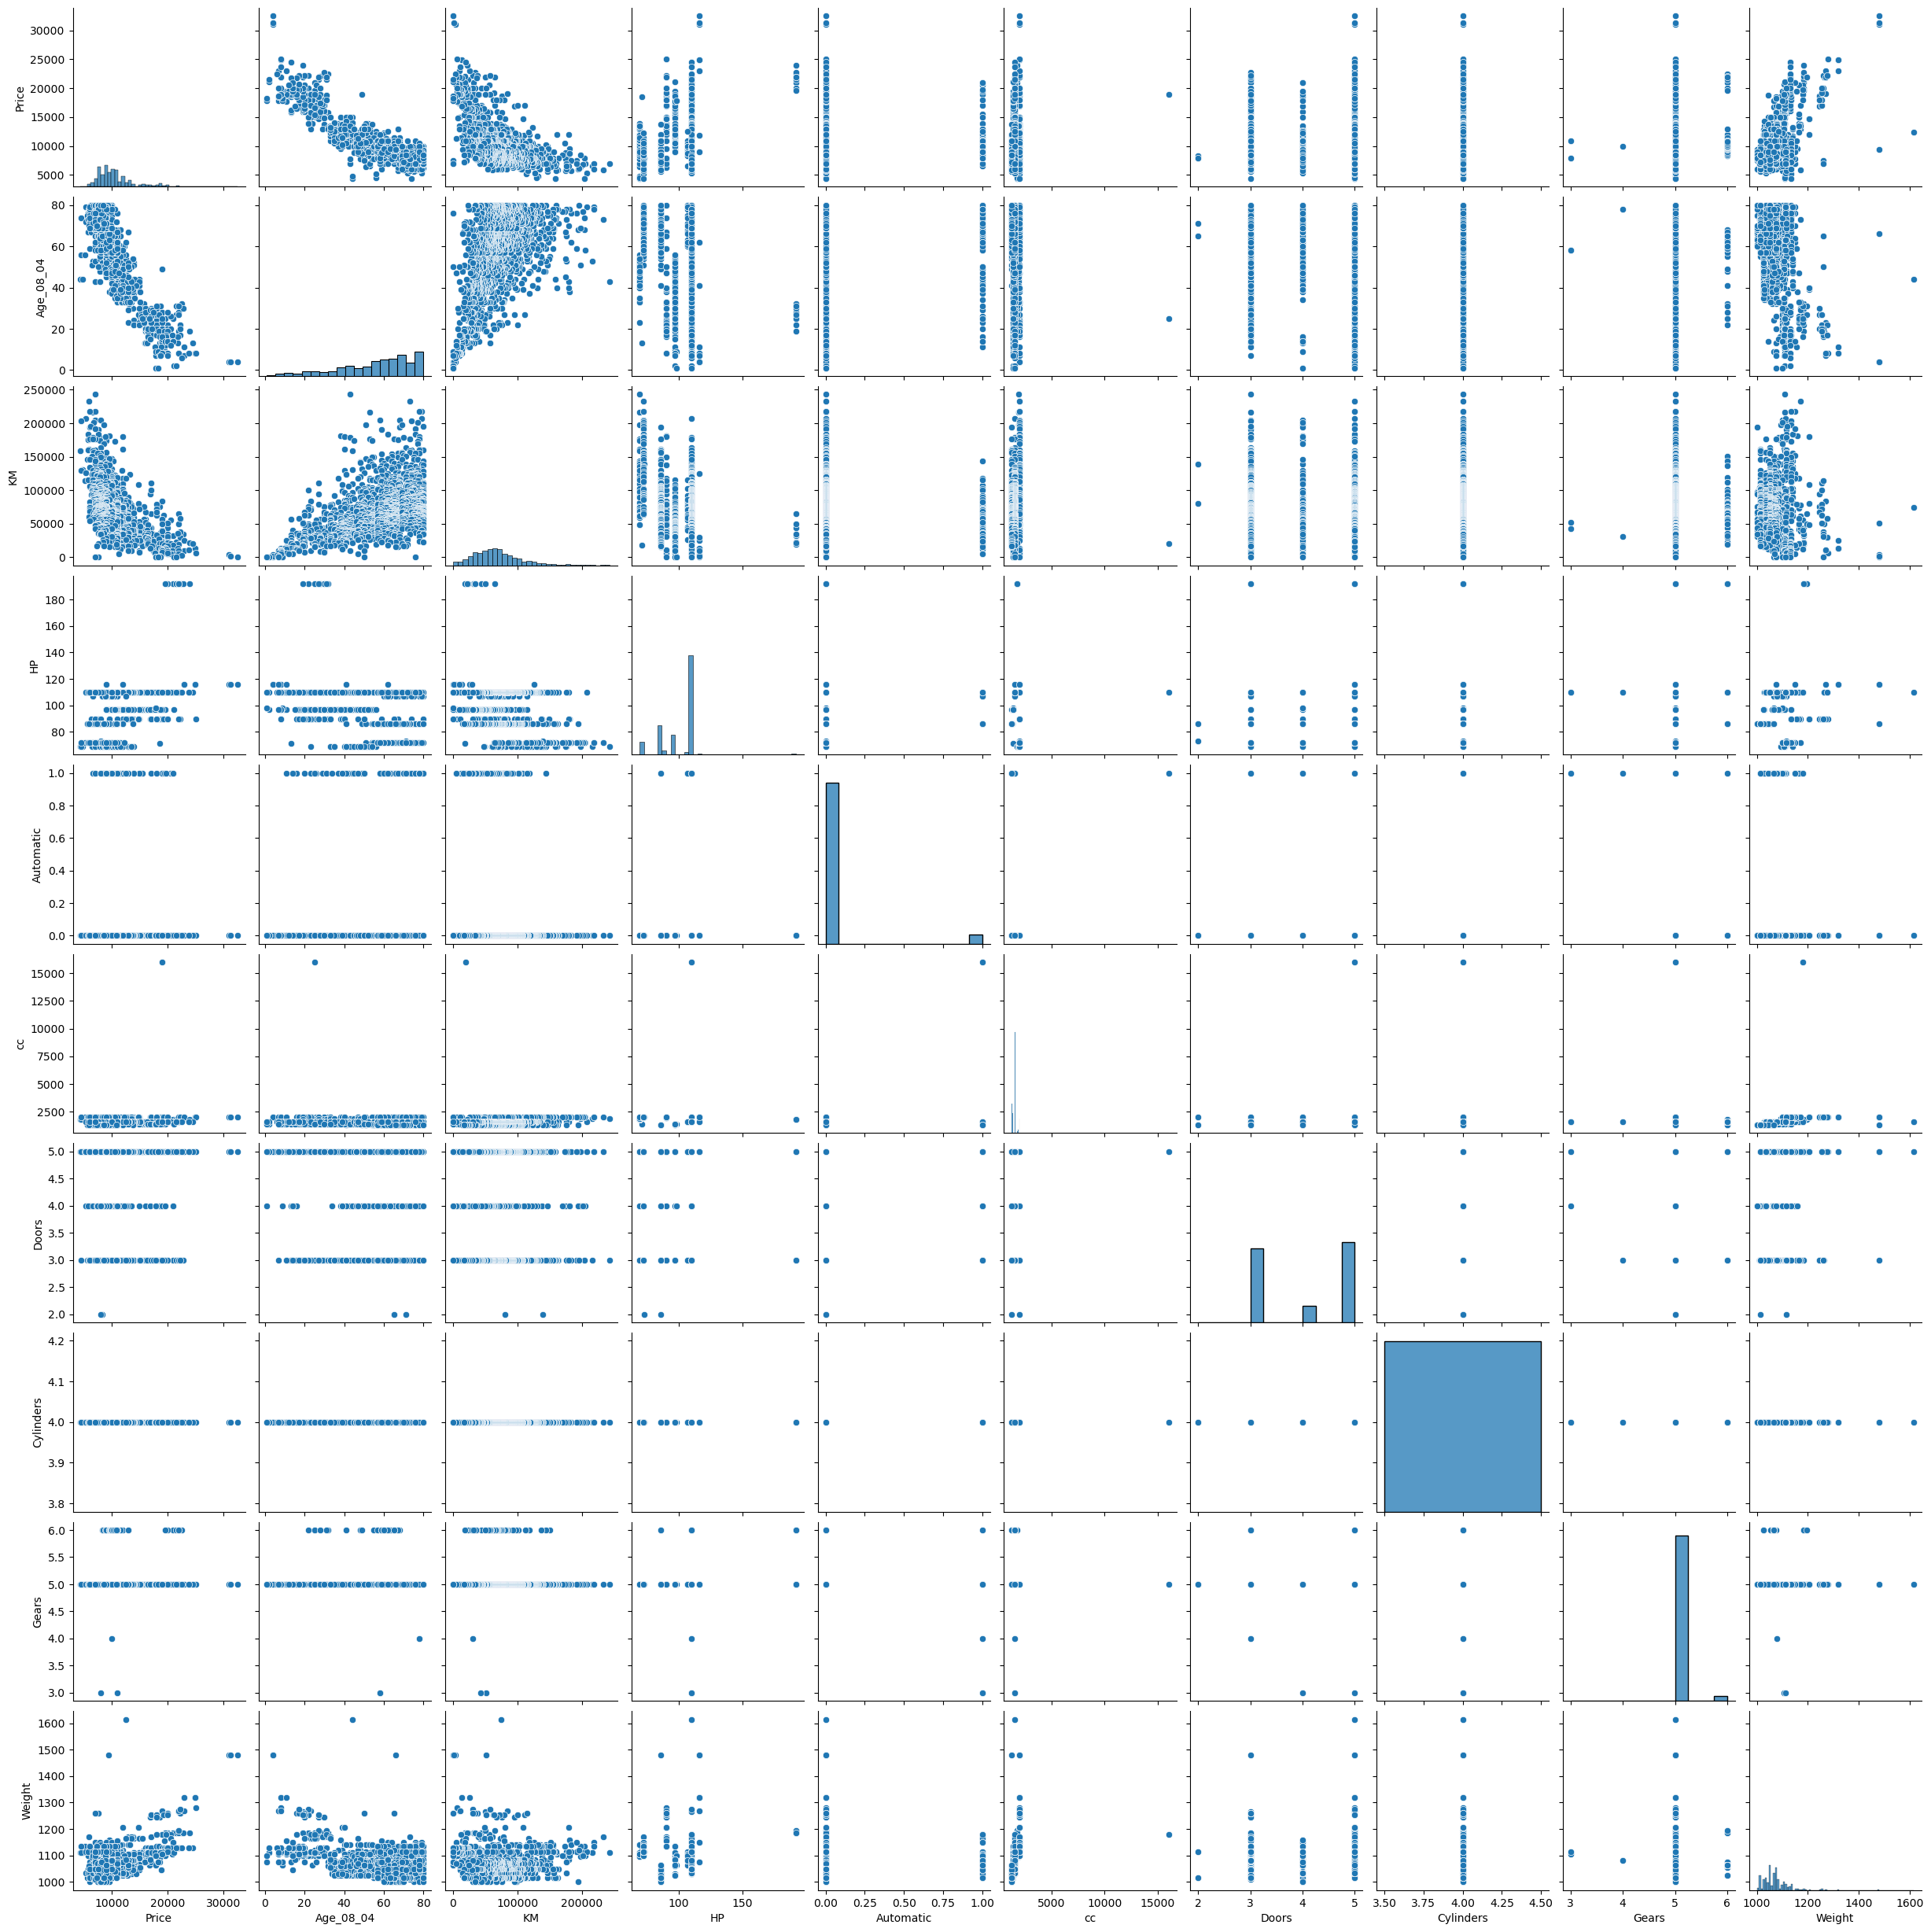

In [8]:
# Pairplot to explore relationships
sns.pairplot(data)
plt.show()

In [9]:
# Perform One-Hot Encoding for the 'Fuel_Type' column
df_encoded = pd.get_dummies(data, columns=['Fuel_Type'], dtype=int)

# Drop multicollinear feature 'Cylinders'
df_encoded = df_encoded.drop('Cylinders', axis=1)

# Check updated data
df_encoded

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


# Preprocess the data for MLR

In [10]:
# Define features (X) and target (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

In [11]:
df_encoded.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [12]:
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df_encoded).fit()

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:51:10   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6971.2342   1143.563  

##### The notes suggest that the dataset might have strong multicollinearity. 

##### Multicollinearity occurs when independent variables are highly correlated, leading to instability in the regression coefficients.

# Check Multicollinearity
### Use the Variance Inflation Factor (VIF) to measure multicollinearity. 

In [14]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [15]:
print("VIF Data:")
print(vif_data)


VIF Data:
             Feature          VIF
0          Age_08_04     1.920520
1                 KM     2.001790
2                 HP     2.299766
3          Automatic     1.094550
4                 cc     1.223892
5              Doors     1.217898
6              Gears     1.117413
7             Weight     3.297145
8      Fuel_Type_CNG    22.221198
9   Fuel_Type_Diesel   221.585039
10  Fuel_Type_Petrol  1541.551915


In [16]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [17]:
model.fittedvalues

0       16304.152422
1       15849.403232
2       16272.811172
3       15915.052508
4       15690.503276
            ...     
1431     8694.200430
1432     8141.751414
1433     8300.294866
1434     8425.824273
1435    10527.736468
Length: 1436, dtype: float64

In [18]:
model.rsquared

0.8649083778053923

In [19]:
model.resid

0      -2804.152422
1      -2099.403232
2      -2322.811172
3       -965.052508
4      -1940.503276
           ...     
1431   -1194.200430
1432    2703.248586
1433     199.705134
1434   -1175.824273
1435   -3577.736468
Length: 1436, dtype: float64

In [20]:
model.params

Intercept          -6971.234151
Age_08_04           -123.777069
KM                    -0.017523
HP                    23.526963
Automatic            300.259212
cc                    -0.055629
Doors                -30.356710
Gears                622.798964
Weight                20.817390
Fuel_Type_CNG      -2889.795047
Fuel_Type_Diesel   -2335.740703
Fuel_Type_Petrol   -1745.698402
dtype: float64

In [21]:
import statsmodels.api as sm

# Q-Q plot

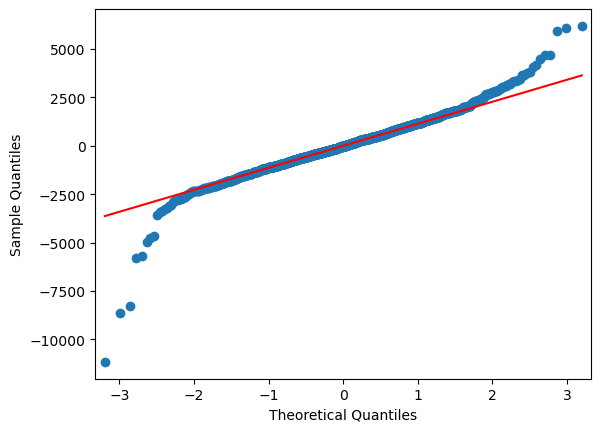

In [22]:
sm.qqplot(model.resid, line='q');

# get index for higher residuals

In [24]:
np.argmax(model.resid), np.max(model.resid)

(147, 6191.469675937977)

# Residual plot of Homoscedasticity
- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [ ]:
model.fittedvalues   #predicted values

In [ ]:
model.resid      #errors

Text(0.5, 1.0, 'Constant Variance')

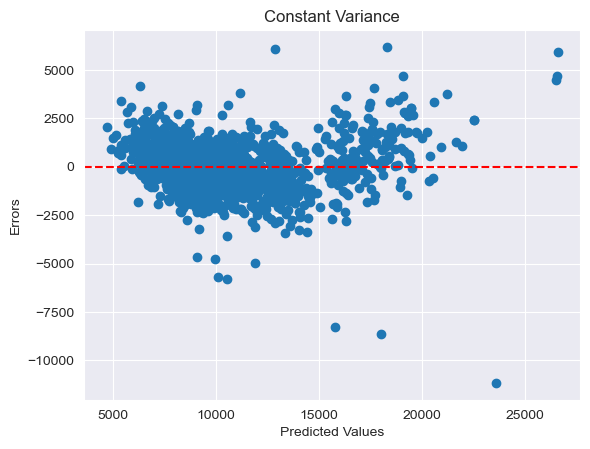

In [25]:
sns.set_style('darkgrid')                   #gride line view
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.title('Constant Variance')

# Residual VS Regressor

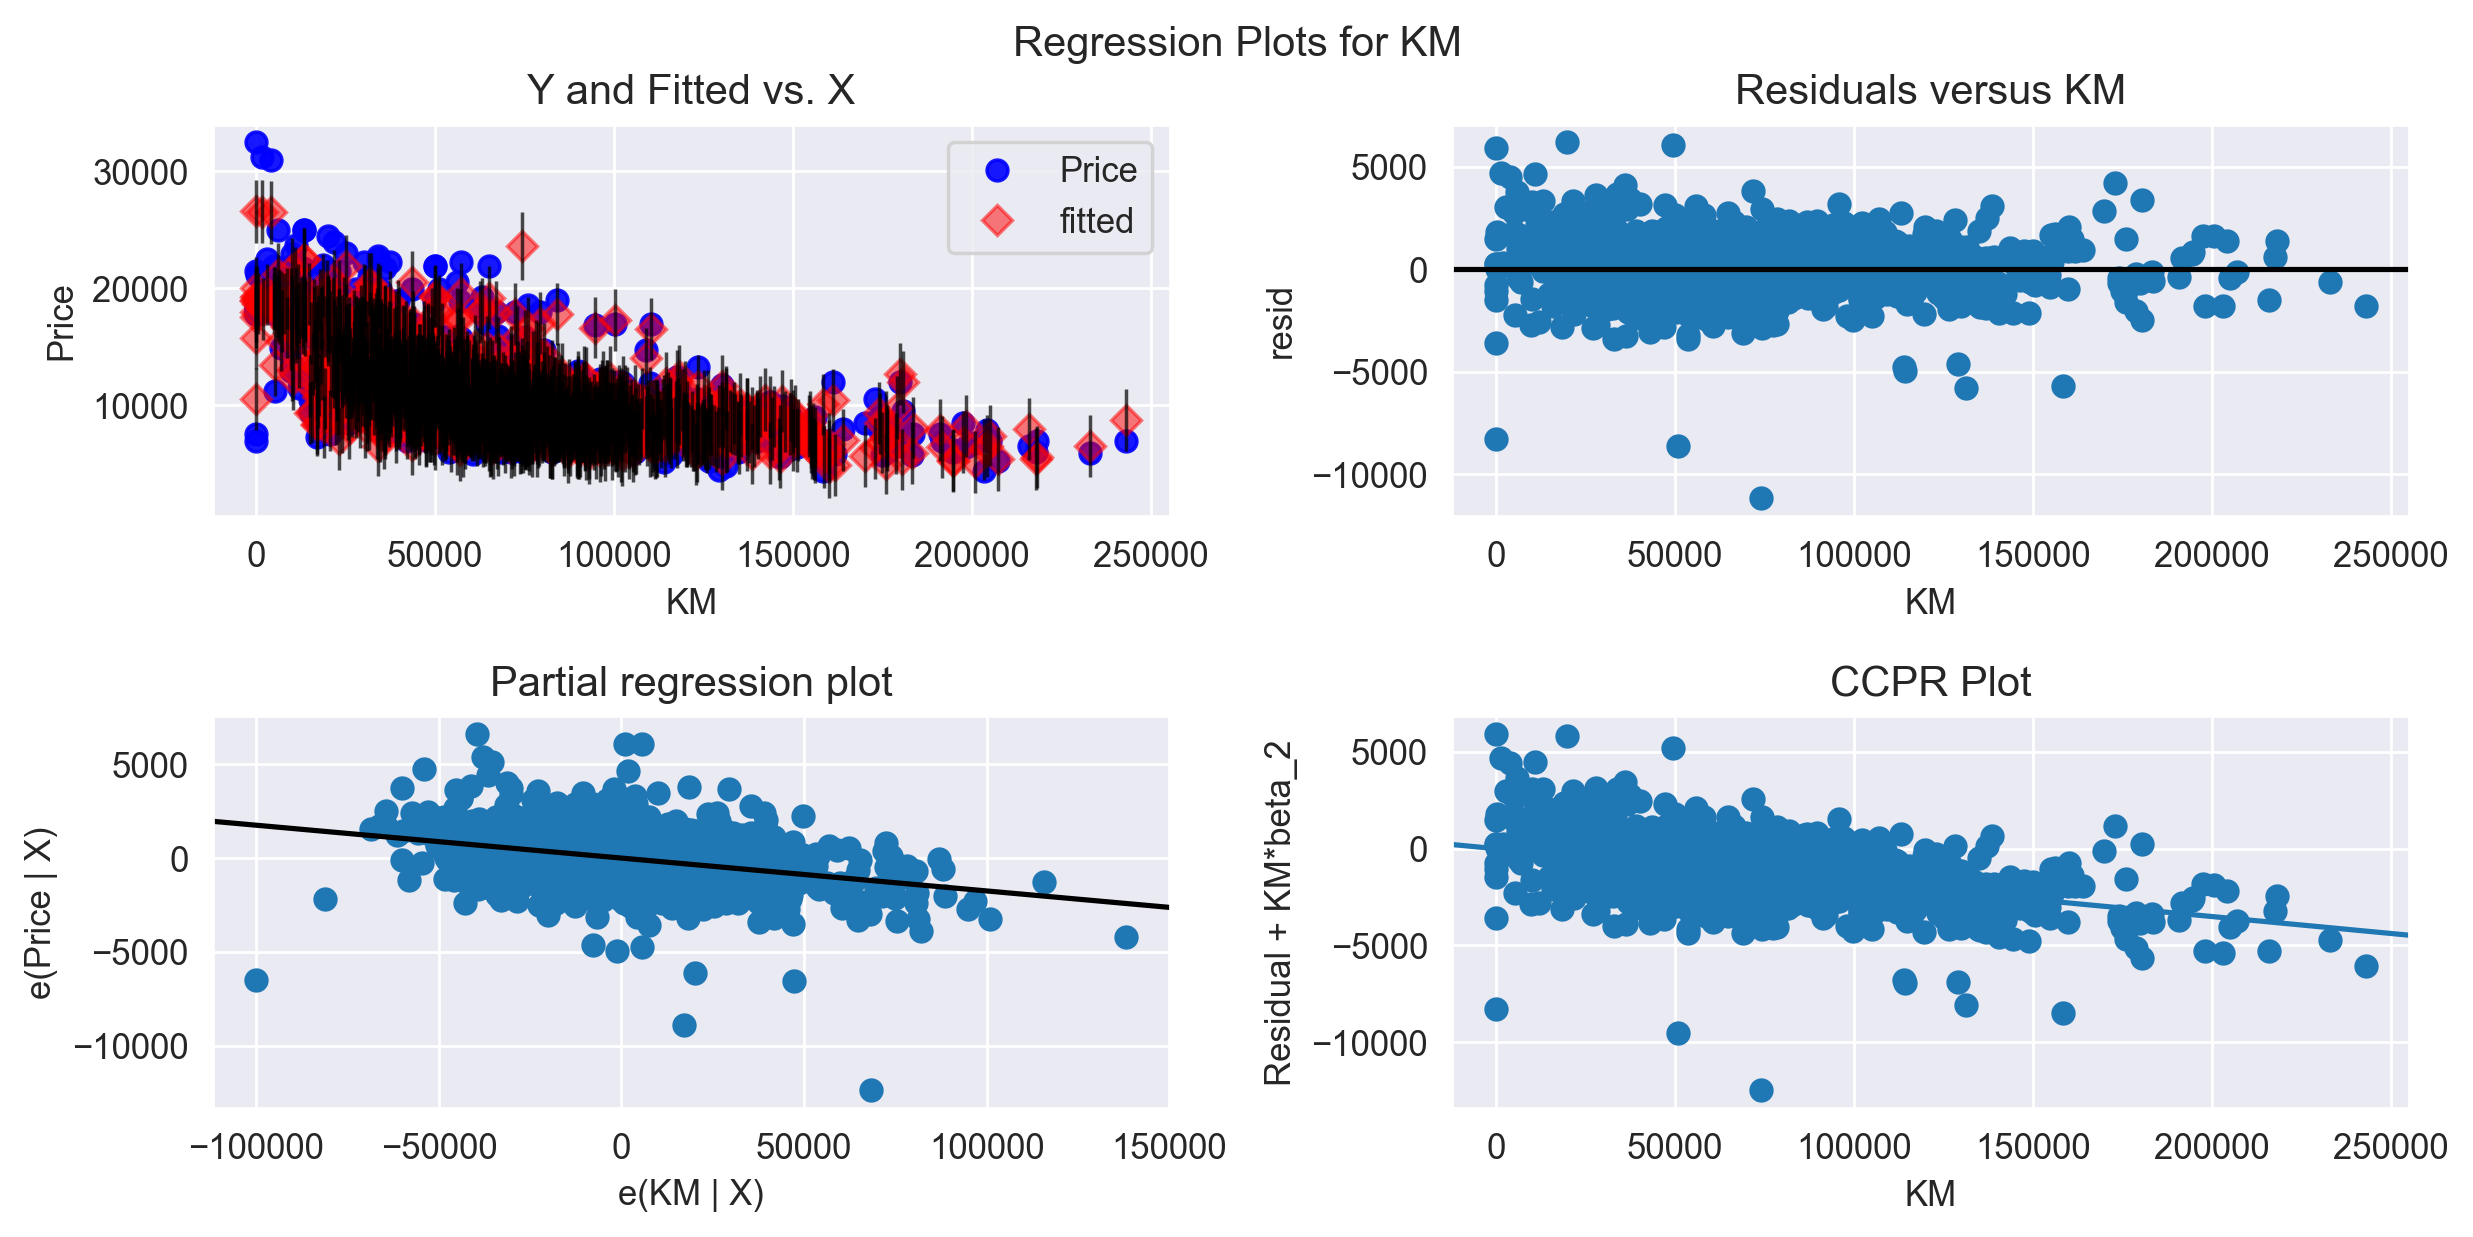

In [37]:
#Vol
sm.graphics.plot_regress_exog(model,'KM');

# MODEL DELETION TECHNIQUES

# Cook's Distance
   - **Detecting influencers and outliers**

In [38]:
model

In [39]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [40]:
c

array([4.23218359e-03, 2.15175576e-03, 2.98539322e-03, ...,
       1.26359065e-05, 4.28390061e-04, 7.06463144e-03])

Text(0, 0.5, 'Cooks Distance')

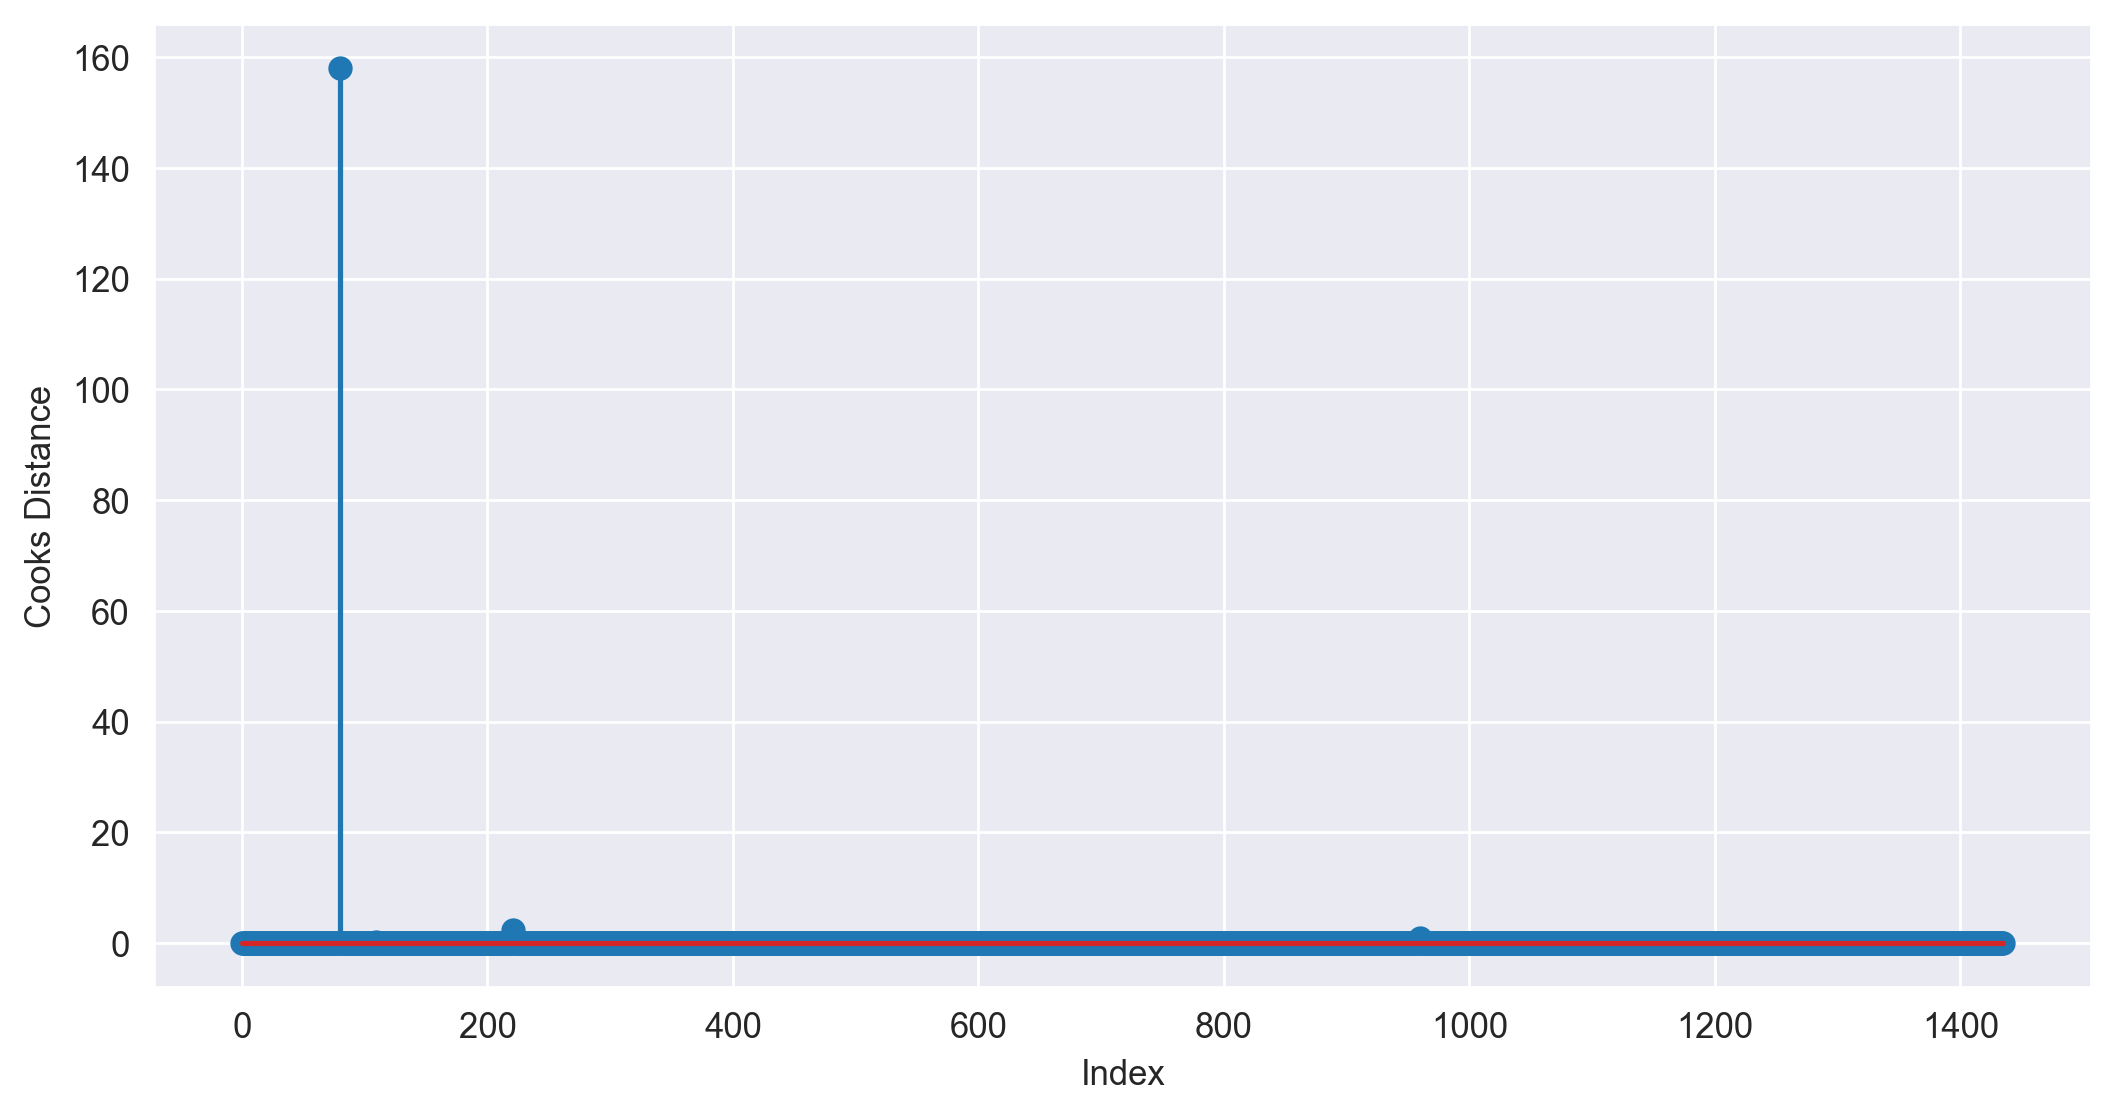

In [41]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [42]:
np.argmax(c), np.max(c)

(80, 158.0531870422271)

In [44]:
df_encoded.iloc[[80]]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
80,18950,25,20019,110,1,16000,5,5,1180,0,0,1


In [46]:
df_encoded['Cooks Distance'] = c

In [47]:
df_encoded[df_encoded['Cooks Distance'] > 1]

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Cooks Distance
80,18950,25,20019,110,1,16000,5,5,1180,0,0,1,158.053187
221,12450,44,74172,110,0,1600,5,5,1615,0,0,1,2.300663


# Improving the model

In [49]:
df_encoded.drop(index=[80,221],inplace=True)

In [50]:
df_encoded

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Cooks Distance
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0,0.004232
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0,0.002152
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0,0.002985
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0,0.000489
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0,0.002072
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1,0.000409
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1,0.002289
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1,0.000013
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1,0.000428


In [51]:
final_mlr_model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data = df_encoded).fit()


In [52]:
final_mlr_model.rsquared

0.8771493794139967

**Since the value is <1 , we can stop the diagnostic process and finalize the model**

# Predicting for new records

In [54]:
# Define new data as a dictionary
test = {
    'Age_08_04': [60, 30, 45, 72],
    'KM': [150000, 80000, 130000, 170000],
    'Fuel_Type': ['Diesel', 'Petrol', 'CNG', 'Diesel'],
    'HP': [110, 90, 100, 95],
    'Automatic': [0, 1, 0, 0],
    'cc': [2000, 1600, 1800, 1900],
    'Doors': [4, 4, 5, 3],
    'Gears': [5, 5, 6, 5],
    'Weight': [1200, 1100, 1250, 1300]
}

# Convert new data to a DataFrame
test = pd.DataFrame(test)
test

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,60,150000,Diesel,110,0,2000,4,5,1200
1,30,80000,Petrol,90,1,1600,4,5,1100
2,45,130000,CNG,100,0,1800,5,6,1250
3,72,170000,Diesel,95,0,1900,3,5,1300


In [55]:
test = pd.get_dummies(test, columns=['Fuel_Type'])
test['Fuel_Type_CNG'] = test['Fuel_Type_CNG'].astype('int64')
test['Fuel_Type_Petrol'] = test['Fuel_Type_Petrol'].astype('int64')
test['Fuel_Type_Diesel'] = test['Fuel_Type_Diesel'].astype('int64')

In [56]:
final_mlr_model.params

Intercept          -7963.170215
Age_08_04           -118.367332
KM                    -0.015683
HP                    46.184753
Automatic            162.521817
cc                    -3.679257
Doors                -52.823498
Gears                448.182896
Weight                26.025926
Fuel_Type_CNG      -3869.262717
Fuel_Type_Diesel   -1509.767699
Fuel_Type_Petrol   -2584.139799
dtype: float64

In [57]:
final_mlr_model.predict(test)

0    12055.140560
1    13737.522437
2    13755.471427
3    12651.646822
dtype: float64

In [58]:
from sklearn.linear_model import Lasso
X =df_encoded.drop(columns="Price")
y = df_encoded["Price"]
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

Lasso(alpha=0.1)

In [59]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print("Lasso MSE: ", lasso_mse)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print("Ridge MSE: ", ridge_mse)

Lasso MSE:  1492617.1139190188
Ridge MSE:  1487462.1444422435


# Interview Questions:

### 1.What is Normalization & Standardization and how is it helpful?
- Normalization is a scaling technique in which values are scaled to a common range, usually between 0 and 1, having a mean of 0 and standard deviation of 1. 
- Standardization is another scaling technique in which values are scaled to have a mean of 0 and standard deviation of 1.

### 2.What techniques can be used to address multicollinearity in multiple linear regression?
There are several techniques that can be used to address multicollinearity in multiple linear regression, including:

1. **Variable selection**: Remove one or more of the highly correlated variables from the model.
2. **Dimensionality reduction**: Use techniques such as principal component regression (PCR) or partial least squares regression (PLS) to reduce the number of variables in the model.
3. **Regularization**: Use techniques such as ridge regression or LASSO regression to reduce the impact of multicollinearity on the model.
4. **Centering and scaling**: Center and scale the variables to reduce the correlation between them.
5. **Collect more data**: Collecting more data can help to reduce the impact of multicollinearity on the model.